In [54]:
!pip install nltk

In [55]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [86]:
# Import required libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from google.colab import drive
import nltk
import re

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Load datasets
graph_file = "/content/drive/MyDrive/Data Mining Final Project/graph.csv"
content_file = "/content/drive/MyDrive/Data Mining Final Project/content.csv"


In [7]:
edges_df = pd.read_csv(graph_file)
content_df = pd.read_csv(content_file)

Edges DataFrame:
                                        Source  \
0         https://learnpython.com/introduction   
1         https://learnpython.com/introduction   
2               https://learnpython.com/basics   
3  https://aiworld.com/artificial-intelligence   
4         https://aiworld.com/machine-learning   

                                  Target  
0         https://learnpython.com/basics  
1    https://datasciencehub.com/overview  
2  https://datasciencehub.com/statistics  
3   https://aiworld.com/machine-learning  
4       https://datasciencehub.com/tools  

Content DataFrame:
                                           URL  \
0         https://learnpython.com/introduction   
1               https://learnpython.com/basics   
2  https://aiworld.com/artificial-intelligence   
3         https://aiworld.com/machine-learning   
4          https://datasciencehub.com/overview   

                              Title  \
0            Introduction to Python   
1                     Pyt

In [81]:
# Inspect the columns of the content DataFrame
print(content_df.columns)

Index(['URL', 'Title', 'Content'], dtype='object')


In [44]:
content_df

,URL,Title,Content
0,https://learnpython.com/introduction,Introduction to Python,Python is a versatile programming language use...
1,https://learnpython.com/basics,Python Basics,"The basics of Python include variables, loops,..."
2,https://aiworld.com/artificial-intelligence,What is Artificial Intelligence?,Artificial Intelligence (AI) refers to the sim...
3,https://aiworld.com/machine-learning,Understanding Machine Learning,Machine Learning (ML) is a subset of AI that e...
4,https://datasciencehub.com/overview,What is Data Science?,"Data Science combines statistics, programming,..."
5,https://datasciencehub.com/tools,Top Data Science Tools,Popular tools in data science include Jupyter ...
6,https://webdevworld.com/html-css,HTML and CSS Basics,HTML (HyperText Markup Language) is the standa...
7,https://webdevworld.com/javascript,Introduction to JavaScript,JavaScript is a programming language used to a...
8,https://blockchaininsights.com/technology,Understanding Blockchain Technology,Blockchain is a decentralized ledger technolog...
9,https://blockchaininsights.com/cryptocurrencies,Cryptocurrencies Explained,Cryptocurrencies are digital currencies built ...


In [52]:
edges_df

,Source,Target
0,https://learnpython.com/introduction,https://learnpython.com/basics
1,https://learnpython.com/introduction,https://datasciencehub.com/overview
2,https://learnpython.com/basics,https://datasciencehub.com/statistics
3,https://aiworld.com/artificial-intelligence,https://aiworld.com/machine-learning
4,https://aiworld.com/machine-learning,https://datasciencehub.com/tools
5,https://datasciencehub.com/overview,https://datasciencehub.com/tools
6,https://datasciencehub.com/tools,https://datasciencehub.com/statistics
7,https://datasciencehub.com/big-data,https://datasciencehub.com/deep-learning
8,https://datasciencehub.com/big-data,https://datasciencehub.com/time-series-analysis
9,https://datasciencehub.com/deep-learning,https://aiworld.com/natural-language-processing


# Task 01: Create a graph from graph.csv and load contents from content.csv

In [8]:
web_graph = nx.DiGraph()
for _, row in edges_df.iterrows():
    web_graph.add_edge(row["Source"], row["Target"])

In [9]:
# Load content into a dictionary
web_content = dict(zip(content_df["URL"], content_df["Content"]))

In [14]:
# Display graph info manually
print(f"Number of nodes: {web_graph.number_of_nodes()}")
print(f"Number of edges: {web_graph.number_of_edges()}")
print(f"Nodes: {list(web_graph.nodes())}")
print(f"Edges: {list(web_graph.edges())}")

Number of nodes: 28
Number of edges: 30
Nodes: ['https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://datasciencehub.com/overview', 'https://datasciencehub.com/statistics', 'https://aiworld.com/artificial-intelligence', 'https://aiworld.com/machine-learning', 'https://datasciencehub.com/tools', 'https://datasciencehub.com/big-data', 'https://datasciencehub.com/deep-learning', 'https://datasciencehub.com/time-series-analysis', 'https://aiworld.com/natural-language-processing', 'https://blockchaininsights.com/nft', 'https://blockchaininsights.com/technology', 'https://blockchaininsights.com/cryptocurrencies', 'https://blockchaininsights.com/ethereum', 'https://cybersecurityworld.com/basics', 'https://cybersecurityworld.com/threats', 'https://cybersecurityworld.com/blockchain-security', 'https://datasciencehub.com/machine-learning-algorithms', 'https://techhistory.com/internet', 'https://techhistory.com/mobile-internet', 'https://techhistory.com/cloud-computin

# Task 02: Visualize the graph

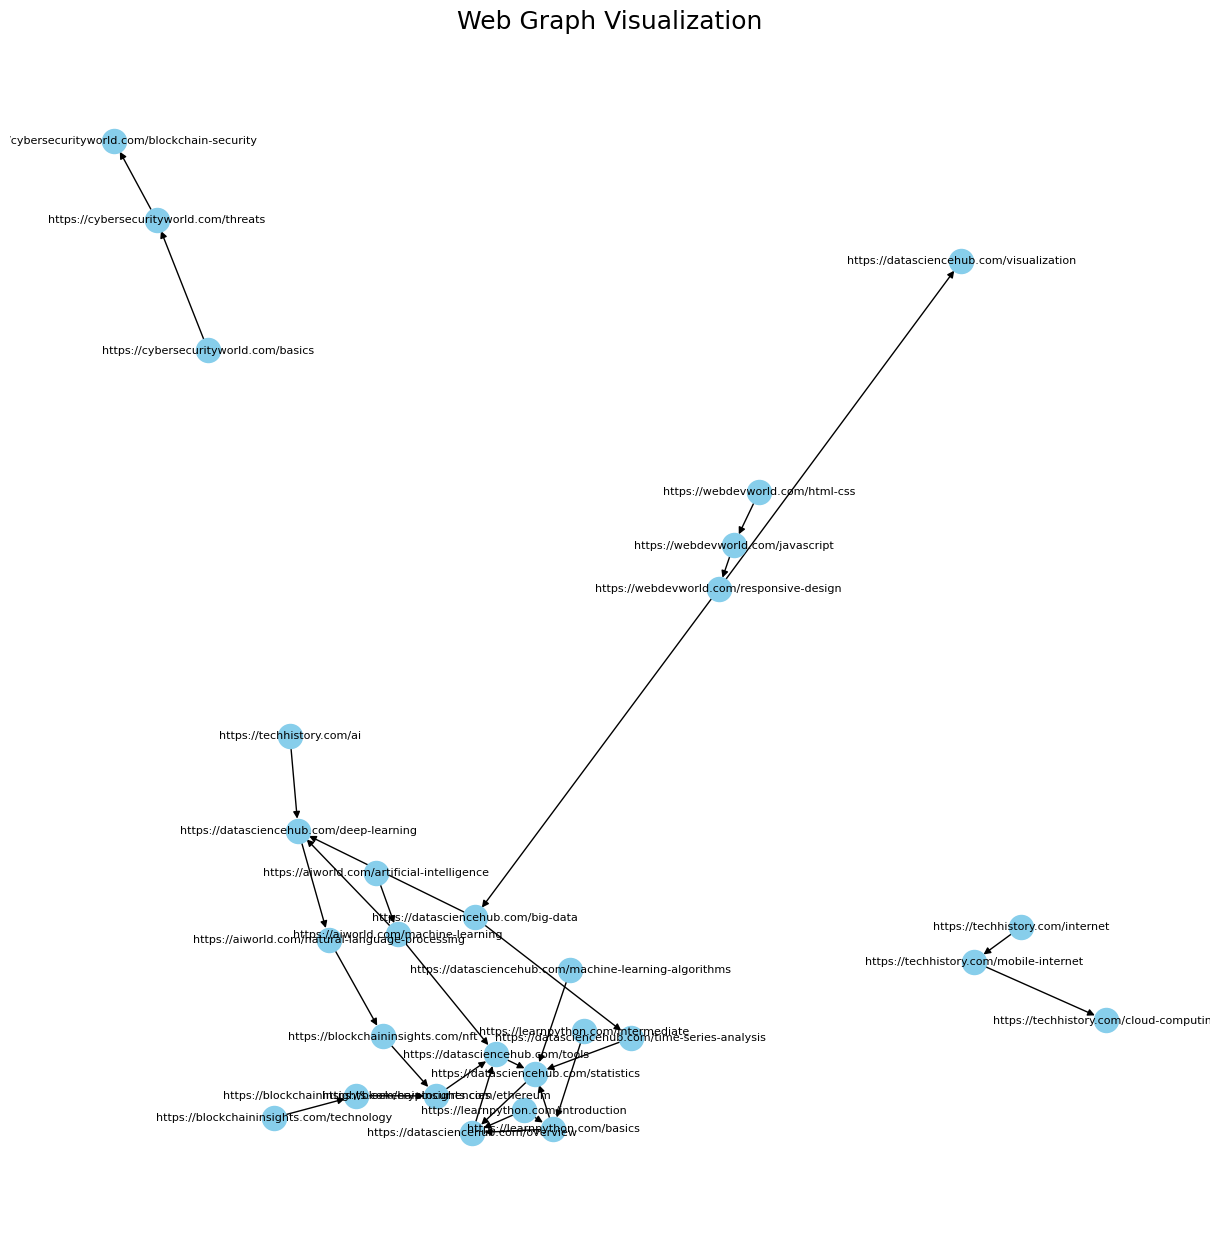

In [22]:
plt.figure(figsize=(12,12))
nx.draw(web_graph, with_labels=True, node_size=300, node_color="skyblue", font_size=8, font_color="black", arrowsize=10)
plt.title("Web Graph Visualization", fontsize=18)
plt.show()

# Task 03: Tokenize and clean the content

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
import nltk
nltk.data.path.append('/usr/local/share/nltk_data')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
# Make sure NLTK resources are downloaded
nltk.download('punkt', quiet=True)

True

In [91]:
# Define an alternative stopwords list (articles, prepositions, conjunctions)
stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
    'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
    'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn',
    'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
]


In [92]:
# Define a function to clean and tokenize content (removing stopwords)
def clean_and_tokenize(content):
    # Tokenize and convert to lowercase
    tokens = word_tokenize(content.lower())
    # Remove stopwords and non-word tokens
    cleaned_tokens = [word for word in tokens if word not in stopwords and re.match(r'\w+', word)]
    return cleaned_tokens


In [93]:
# Apply the function to the 'Content' column in the content_df DataFrame
content_df['cleaned_tokens'] = content_df['Content'].apply(clean_and_tokenize)

In [94]:

# Display the cleaned tokens (first few tokens of each)
print("\nCleaned Tokens (after removing articles, prepositions, conjunctions):")
print(content_df[['Title', 'Content', 'cleaned_tokens']].head())


Cleaned Tokens (after removing articles, prepositions, conjunctions):
                              Title  \
0            Introduction to Python   
1                     Python Basics   
2  What is Artificial Intelligence?   
3    Understanding Machine Learning   
4             What is Data Science?   

                                             Content  \
0  Python is a versatile programming language use...   
1  The basics of Python include variables, loops,...   
2  Artificial Intelligence (AI) refers to the sim...   
3  Machine Learning (ML) is a subset of AI that e...   
4  Data Science combines statistics, programming,...   

                                      cleaned_tokens  
0  [python, versatile, programming, language, use...  
1  [basics, python, include, variables, loops, co...  
2  [artificial, intelligence, ai, refers, simulat...  
3  [machine, learning, ml, subset, ai, enables, c...  
4  [data, science, combines, statistics, programm...  


# Task 04: Build an inverted index

In [51]:
# prompt: Using dataframe content_df: Build an inverted index

import pandas as pd

def build_inverted_index(df):

    inverted_index = {}
    # Iterate through each document in the DataFrame
    for index, row in df.iterrows():
        url = row['URL']
        content = row['Content']

        # Tokenize the content (split into words)
        words = content.lower().split()

        # Update the inverted index for each word
        for word in words:
            if word not in inverted_index:
                inverted_index[word] = []
            inverted_index[word].append(url)
    return inverted_index

# Build the inverted index from the content_df DataFrame.
inverted_index = build_inverted_index(content_df)

# Print the inverted index (optional)
for word, urls in inverted_index.items():
    print(f"{word}: {urls}")

python: ['https://learnpython.com/introduction', 'https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://learnpython.com/basics', 'https://datasciencehub.com/tools']
is: ['https://learnpython.com/introduction', 'https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://aiworld.com/machine-learning', 'https://datasciencehub.com/overview', 'https://webdevworld.com/html-css', 'https://webdevworld.com/html-css', 'https://webdevworld.com/javascript', 'https://blockchaininsights.com/technology']
a: ['https://learnpython.com/introduction', 'https://aiworld.com/machine-learning', 'https://webdevworld.com/javascript', 'https://blockchaininsights.com/technology', 'https://techhistory.com/internet', 'https://techhistory.com/internet']
versatile: ['https://learnpython.com/introduction']
programming: ['https://learnpython.com/introduction', 'https://webdevworld.com/javascript']
language: ['https://learnpython.com/introduction', 'https://aiworld.com

# Task 05: Single-word query with PageRank

In [95]:
pagerank_scores = nx.pagerank(web_graph, alpha=0.85)

def single_word_query(word, index, scores):
    word = word.lower()
    if word in index:
        urls = index[word]
        ranked_urls = sorted(urls, key=lambda url: scores.get(url, 0), reverse=True)
        return ranked_urls
    return []

In [97]:
query_word = input("\nEnter a single-word query: ")
results = single_word_query(query_word, inverted_index, pagerank_scores)
print(f"\nSearch Results for '{query_word}':")
for url in results:
    print(f"- {url} (PageRank: {pagerank_scores[url]:.4f})")


Enter a single-word query: python

Search Results for 'python':
- https://datasciencehub.com/tools (PageRank: 0.2203)
- https://learnpython.com/basics (PageRank: 0.0156)
- https://learnpython.com/basics (PageRank: 0.0156)
- https://learnpython.com/introduction (PageRank: 0.0069)
- https://learnpython.com/introduction (PageRank: 0.0069)


# Task 06: Bag-of-words query (Bonus)

In [98]:
def bag_of_words_query(words, index, scores):
    words = [word.lower() for word in words]
    relevant_urls = set()
    for word in words:
        if word in index:
            relevant_urls.update(index[word])
    ranked_urls = sorted(relevant_urls, key=lambda url: scores.get(url, 0), reverse=True)
    return ranked_urls

In [102]:
query_words = input("\nEnter a multi-word query (space-separated): ").split()
results = bag_of_words_query(query_words, inverted_index, pagerank_scores)
print(f"\nSearch Results for '{' '.join(query_words)}':")
for url in results:
    print(f"- {url} (PageRank: {pagerank_scores[url]:.4f})")


Enter a multi-word query (space-separated): python is

Search Results for 'python is':
- https://datasciencehub.com/tools (PageRank: 0.2203)
- https://datasciencehub.com/overview (PageRank: 0.2014)
- https://learnpython.com/basics (PageRank: 0.0156)
- https://webdevworld.com/javascript (PageRank: 0.0127)
- https://aiworld.com/machine-learning (PageRank: 0.0127)
- https://blockchaininsights.com/technology (PageRank: 0.0069)
- https://webdevworld.com/html-css (PageRank: 0.0069)
- https://learnpython.com/introduction (PageRank: 0.0069)
